# Imports

In [37]:
# 시스템 관리
import os

# 탐색적 데이터분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 데이터 파이프라인 편의성
from utils import pipe_newb, pipe_rental, pipe_broken # 우리 팀이 만든 편의성을 위한, EDA 프로세스를 압축한 데이터 파이프라인 함수 모음 파일

# 추론통계 -> 비교분석 및 시계열 분해
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from scipy.stats import shapiro
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# custom parameters
pd.set_option('display.max_columns', None)

# 데이터셋 포멧

| 데이터셋 이름 | 날짜 정보 | 내용 | 파일 명 |
| ---------- | ------- | ----- | ---- |
| 신규가입자 정보 | 월별/일별 | 가입 | 신규가입자정보(월별)_YYMM-MM.csv |
| 고장신고 내역 | 월별 | 고장 | 고장신고내역(일별)_YYMM-MM.csv |
| 대여이력 정보 | 일별 | 대여 | 대여이력정보(일별)_YYMM.csv |

# 데이터셋 2022년 하반기, 2023년 하반기 병합

병합용도 함수 만들기

In [30]:
def merge_files(read_path: str, save_path: str, date_col: str) -> str:
    broken_file_path = read_path
    broken_data_dir = os.listdir(broken_file_path)
    print(f'원래 파일 폴더: {broken_data_dir}\n')

    df22 = pd.DataFrame()
    df23 = pd.DataFrame()
    for file in broken_data_dir:
        print(f'병합 진행중인 파일: {file}\n')
        try:
            # try csv
            df = pd.read_csv(f'{broken_file_path}/{file}', encoding='cp949')
        except:
            # else excel
            df = pd.read_excel(f'{broken_file_path}/{file}')
        # convert to datetime
        df[date_col] = pd.to_datetime(df[date_col])
        
        # if year 2022
        df22_new = df.loc[(df[date_col].dt.month.isin([month for month in range(6, 13)])) & (df[date_col].dt.year == 2022)]
        df22 = pd.concat([df22, df22_new], axis=0)
        df22 = df22.sort_values(by=date_col)
        
        # if year 2023
        df23_new = df.loc[(df[date_col].dt.month.isin([month for month in range(6, 13)])) & (df[date_col].dt.year == 2023)]
        df23 = pd.concat([df23, df23_new], axis=0)
        df23 = df23.sort_values(by=date_col)
    
    # save files
    df22.to_csv(f'{save_path}2207-12.csv', index=False)
    df23.to_csv(f'{save_path}2307-12.csv', index=False)
        
    return f'모든 파일 병합 완료.'

## 고장신고내역 병합

원래 파일 폴더: ['고장신고내역(일별)_2311-12.csv', '고장신고내역(일별)_2207-12.csv', '고장신고내역(일별)_2307-10.csv']

위의 데이터를 다음과 같이 병합:  

2022년 하반기 -> 고장신고내역(일별)_2207-12.csv  
 
2023년 하반기 -> 고장신고내역(일별)_2307-12.csv

In [ ]:
read_path = './data/원본/고장'
save_path = './data/원본/고장신고내역(일별)_'
date_col = '등록일시'

merge_files(read_path, save_path, date_col)

## 대여이력정보 병합

원래 파일 폴더: ['대여이력정보(일별)_2310.csv', '대여이력정보(일별)_2311.csv', '대여이력정보(일별)_2312.csv', '대여이력정보(일별)_2207.csv', '대여이력정보(일별)_2212.csv', '대여이력정보(일별)_2210.csv', '대여이력정보(일별)_2211.csv', '\x08대여이력정보(일별)_2307.csv', '대여이력정보(일별)_2208.csv', '대여이력정보(일별)_2209.csv', '대여이력정보(일별)_2308.csv', '대여이력정보(일별)_2309.csv']

위의 데이터를 다음과 같이 병합:

2022년 하반기 -> 대여이력정보(일별)_2207-12.csv

2023년 하반기 -> 대여이력정보(일별)_2307-12.csv

In [ ]:
read_path = './data/원본/대여'
save_path = './data/원본/대여이력정보(일별)_'
date_col = '대여일시'

merge_files(read_path, save_path, date_col)

원래 파일 폴더: ['대여이력정보(일별)_2310.csv', '대여이력정보(일별)_2311.csv', '대여이력정보(일별)_2312.csv', '대여이력정보(일별)_2207.csv', '대여이력정보(일별)_2212.csv', '대여이력정보(일별)_2210.csv', '대여이력정보(일별)_2211.csv', '\x08대여이력정보(일별)_2307.csv', '대여이력정보(일별)_2208.csv', '대여이력정보(일별)_2209.csv', '대여이력정보(일별)_2308.csv', '대여이력정보(일별)_2309.csv']

병합 진행중인 파일: 대여이력정보(일별)_2310.csv

병합 진행중인 파일: 대여이력정보(일별)_2311.csv

병합 진행중인 파일: 대여이력정보(일별)_2312.csv

병합 진행중인 파일: 대여이력정보(일별)_2207.csv

병합 진행중인 파일: 대여이력정보(일별)_2212.csv

병합 진행중인 파일: 대여이력정보(일별)_2210.csv

병합 진행중인 파일: 대여이력정보(일별)_2211.csv

병합 진행중인 파일:대여이력정보(일별)_2307.csv

병합 진행중인 파일: 대여이력정보(일별)_2208.csv

병합 진행중인 파일: 대여이력정보(일별)_2209.csv

병합 진행중인 파일: 대여이력정보(일별)_2308.csv

병합 진행중인 파일: 대여이력정보(일별)_2309.csv



'모든 파일 병합 완료.'

## 신규가입정보 병합

신규가입자정보는 아래와 같이 이미 하반기로 묶여서 불러오기

2022년 하반기 -> 신규가입자정보(일별)_2207-12.csv

2023년 하반기 -> 신규가입자정보(일별)_2307-12.csv

컬럼명들이 달르고, 2022년 건수는 문자열이라서 수정할 필요가 있음

In [34]:
df_newb22 = pd.read_csv('./data/원본/신규가입자정보(월별)_2207-12.csv', encoding='cp949')
df_newb23 = pd.read_csv('./data/원본/신규가입자정보(월별)_2307-12.csv', encoding='cp949')

df_newb22.columns = ['가입일시', '회원구분', '연령대', '성별', '가입건수']
df_newb22['가입건수'] = df_newb22['가입건수'].str.replace(',', '').astype('int')
df_newb23.columns = ['가입일시', '회원구분', '연령대', '성별', '가입건수']

# 22년 23년 데이터 하나로 병합

In [35]:
# 신규가입자정보
df_newb22 = pd.read_csv('./혹시-데이터/신규/신규가입자정보(월별)_2207-12.csv', encoding='cp949')
df_newb23 = pd.read_csv('./혹시-데이터/신규/신규가입자정보(월별)_2307-12.csv', encoding='cp949')

# 대여이력정보
df_rental22 = pd.read_csv('./data/원본/대여이력정보(일별)_2207-12.csv')
df_rental23 = pd.read_csv('./data/원본/대여이력정보(일별)_2307-12.csv')

# 고장신고내역
df_broken22 = pd.read_csv('./data/원본/고장신고내역(일별)_2207-12.csv')
df_broken23 = pd.read_csv('./data/원본/고장신고내역(일별)_2307-12.csv')


# 대여이력정보 병합
df_rental = pd.concat([df_rental22, df_rental23], axis=0)
# 고장신고내역 병합
df_broken = pd.concat([df_broken22, df_broken23], axis=0)
# 신규가입자정보 병합
df_newb = pd.concat([df_newb22, df_newb23], axis=0)

년월 별로 가입건수 합산 데이터프레임 생성

In [ ]:
# 회원구분, 연령대, 성별 컬럼 제외
df_newb.drop(columns=['회원구분', '연령대', '성별'], inplace=True)

# 연도 컬럼 생성
df_newb['year'] = (
    df_newb['가입일시']
    .astype('str')
    .apply(lambda x: x[:4] + '-' + x[4:])
    .apply(lambda x: pd.to_datetime(x)).dt.to_period('M')
).dt.year

# 월 컬럼 생성
df_newb['month'] = (
    df_newb['가입일시']
    .astype('str')
    .apply(lambda x: x[:4] + '-' + x[4:])
    .apply(lambda x: pd.to_datetime(x)).dt.to_period('M')
).dt.month

# 원래 데이터의 가입일시와 월별 가입건수 합산 병합
df_newb = pd.concat([df_newb['가입일시'].astype('str').str.replace('-','').drop_duplicates().reset_index(drop=True),df_newb.groupby(['year', 'month']).agg({'가입건수':'sum'}).reset_index()['가입건수']], axis=1)

csv 데이터 용량의 문제로 EDA는 parquet으로 진행하기 위해 확장자 변환

In [36]:
# pip3 install pyarrow
# pip3 install fastparquet
df_newb.to_parquet('./data/원본/parquet/신규가입자정보.parquet', engine='pyarrow', index=False)
df_rental.to_parquet('./data/원본/parquet/대여이력정보.parquet', engine='pyarrow', index=False)
df_broken.to_parquet('./data/원본/parquet/고장신고내역.parquet', engine='pyarrow', index=False)

# 데이터 전처리

## 1. newb data

### 1) 데이터확인

In [ ]:
df_newb

,가입일시,가입건수,year
0,202207,56393,2022
1,202208,53853,2022
2,202209,81574,2022
3,202210,62511,2022
4,202211,36600,2022
5,202212,11530,2022
6,202307,42649,2023
7,202308,41346,2023
8,202309,61111,2023
9,202310,66836,2023


### 2) 타입 변환

- 가입일시 데이터타입 변환
    - 가입일시가 년월로 되어있어 바로 datetime으로 변환시 날짜가 제대로 나오지 않음.
    - period 사용하여 년-월 로 인식할 수 있게 바꿔준 후 year 제거.

In [ ]:
df_newb['가입일시'] = (
    df_newb['가입일시']
    .astype('str')
    .apply(lambda x: x[:4] + '-' + x[4:])
    .apply(lambda x: pd.to_datetime(x)).dt.to_period('M')
)

df_newb.drop(columns=['year'], inplace=True)

### 최종데이터

In [ ]:
df_newb

,가입일시,가입건수
0,2022-07,56393
1,2022-08,53853
2,2022-09,81574
3,2022-10,62511
4,2022-11,36600
5,2022-12,11530
6,2023-07,42649
7,2023-08,41346
8,2023-09,61111
9,2023-10,66836


---

## 2. broken data

### 1) 데이터 확인
- broken data 총 194,729건

In [ ]:
df_broken.head(5)

,자전거번호,등록일시,고장구분
0,SPB-30229,2022-07-01 00:44:33,페달
1,SPB-40134,2022-07-01 00:57:59,페달
2,SPB-40789,2022-07-01 01:08:25,안장
3,SPB-50932,2022-07-01 01:09:33,체인
4,SPB-41175,2022-07-01 01:13:06,안장


In [ ]:
df_broken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194729 entries, 0 to 194728
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   자전거번호   194729 non-null  object
 1   등록일시    194729 non-null  object
 2   고장구분    194729 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


### 2) 타입 변환
- 등록일시가 년월일시간으로 되어있어 datetime으로 변환

In [ ]:
df_broken['등록일시'] = pd.to_datetime(df_broken['등록일시'])

In [ ]:
df_broken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194729 entries, 0 to 194728
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   자전거번호   194729 non-null  object        
 1   등록일시    194729 non-null  datetime64[ns]
 2   고장구분    194729 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 4.5+ MB


### 3) 중복값 확인

- 중복값 1개 존재
    - 자전거번호, 등록일시, 고장구분이 똑같은 데이터 존재
    - 해당 데이터를 확인해보았을 때, 시스템상 오류로 같은 데이터가 두 번들어간 것으로 보여 제거

In [ ]:
df_broken.duplicated().sum()

np.int64(1)

In [ ]:
df_broken.drop_duplicates(inplace = True)

### 최종데이터
- broken data 총 194,728건

In [ ]:
df_broken.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194728 entries, 0 to 194728
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   자전거번호   194728 non-null  object        
 1   등록일시    194728 non-null  datetime64[ns]
 2   고장구분    194728 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 5.9+ MB


---

## 3. rental data

### 1) 데이터 확인

- rentaldata 총 47,375,277

In [ ]:
df_rental.head(5)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-39460,2022-07-01 00:00:09,1124,발산역 6번 출구 뒤,0,2022-07-01 00:05:21,01180,마곡엠밸리 15단지(1502동) 건너편,0,5,774.45,2002,\N,내국인,ST-522,ST-1517,NaN
1,SPB-34271,2022-07-01 00:00:10,296,KT플라자 영등포점,0,2022-07-01 00:07:46,03202,당산롯데캐슬프레스티지,0,7,297.65,2003,F,내국인,ST-1968,ST-1973,NaN
2,SPB-31521,2022-07-01 00:00:13,347,동대문역사문화공원역 9번출구 앞,0,2022-07-01 00:08:19,00455,종로6가역 버스정류장(동대문 방향),0,8,995.92,1990,\N,내국인,ST-163,ST-1608,NaN
3,SPB-43216,2022-07-01 00:00:16,2824,미래사랑어린이공원 앞,0,2022-07-01 00:23:51,01907,구일우성(아) 육교 밑,0,23,3356.68,1985,M,내국인,ST-1964,ST-665,NaN
4,SPB-59945,2022-07-01 00:00:17,2620,송파나루역 4번 출구옆,0,2022-07-01 00:09:58,04486,홈플러스 잠실점,0,9,1360.00,2000,M,내국인,ST-1730,ST-2596,NaN


In [ ]:
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47375277 entries, 0 to 47375276
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 6.0+ GB


### 1) 중복값 확인
- 존재하지 않음.

In [ ]:
df_rental.duplicated().sum()

np.int64(338)

### 2) 1차 변수 선별
- 사용하지않는 변수제거

In [ ]:
df_rental.drop(columns=['자전거구분', '성별', '대여거치대', '반납일시', '반납거치대', '대여 대여소번호', '대여 대여소명', '반납대여소번호', '반납대여소명'], inplace=True)

### 3) 타입변환
- 대여일시 년월일시간으로 되어있어 datetime타입으로 변환

In [ ]:
df_rental['대여일시'] = pd.to_datetime(df_rental['대여일시'])

### 4) 결측치 확인

- 결측치가 '\N'으로 들어가있어서 변환

In [ ]:
df_rental.replace('\\N', np.nan, inplace=True)

- 당시(22년도, 23년도) 회원의 나이가 필요하기때문에 '생년' 결측치 제외

In [ ]:
df_rental.dropna(subset = ['생년'], inplace = True)

- '반납대여소ID' 결측치 제외
    - 반납시간은 존재하지만 반납대여소ID가 없는 경우가 있음.
    - 이 경우 시스템오류 & 사용자가 직접 반납이 되지 않은 경우 강제반납프로세스를 통해 반납처리가 된 경우라고 확인됨. <br/>
    -> 어떤 경우로 처리가 되었는지 알 수 없으므로 오류로 분류하여 제외

In [ ]:
df_rental.dropna(subset = ['반납대여소ID'], inplace = True)

### 6) 이상치 제외

- 이용자 종류
    - 이용자 종류에서 외국인 제외
    - 외국인의 경우 내국인에 비해 긴 시간동안 이용해 서울 관광이 중심인 것을 확인할 수 있음. <br/>
        -> 따라서 버스와 지하철 요금인상에 영향을 받지 않으므로 제외

In [ ]:
df_rental = df_rental[df_rental['이용자종류'] != '외국인']

- 나이 조건
    - 따릉이의 경우 만 14세부터 사용할 수 있고, 버스와 지하철의 경우 65세이후는 무료탑승
    - 만14세이상 만65세미만 데이터 사용
        - 2022년 기준: 만 14세 2008년생, 만 64세 1958년생
        - 2023년 기준: 만 14세 2009년생, 만 64세 1959년생

In [ ]:
df_rental['나이(만)'] = df_rental['대여일시'].dt.year - df_rental['생년'].astype('int')

In [ ]:
df_rental = df_rental[(df_rental['나이(만)'] >= 14) & (df_rental['나이(만)'] <= 64)]

- 이용거리(M), 이용시간(분)
    - 이용거리(M), 이용시간(분)이 0인 경우 오류
    - 이용거리(M) 1km(1000m)이상 15km(15000m)이하 / 이용시간(분) 5분이상 60분이하
        - 실제 버스와 지하철 대신 따릉이를 사용한다면 실제 사용할 시간과 거리를 생각해봄.
        - 따릉이를 1시간이상 타게되면 버스와 지하철대신 타는 것보다 요금이 비싸짐
        - 대체로 출퇴근시간대에 집중되어있고, 단거리에 많이 사용하며, 평균적으로 걸리는 시간과 거리를 고려함.
    

In [ ]:
df_rental = df_rental[(df_rental['이용거리(M)'] >= 1000) & (df_rental['이용거리(M)'] <= 15000)]

In [ ]:
df_rental = df_rental[(df_rental['이용시간(분)'] >= 5) & (df_rental['이용시간(분)'] <= 60)]

### 7) 2차변수 제거
- 이상치제거, 파생변수 만든 후 변수 제거

In [ ]:
df_rental.drop(columns=['생년', '이용자종류'], inplace=True)

### 최종데이터
- rentaldata 총 24,872,129건

In [ ]:
df_rental.head(5)

,자전거번호,대여일시,이용시간(분),이용거리(M),대여대여소ID,반납대여소ID,나이(만)
3,SPB-43216,2022-07-01 00:00:16,23,3356.68,ST-1964,ST-665,37
4,SPB-59945,2022-07-01 00:00:17,9,1360.00,ST-1730,ST-2596,22
5,SPB-41020,2022-07-01 00:00:20,12,1848.00,ST-1136,ST-1120,55
6,SPB-60168,2022-07-01 00:00:20,6,1510.00,ST-1462,ST-1135,28
7,SPB-63298,2022-07-01 00:00:22,18,1700.00,ST-3029,ST-639,30


In [ ]:
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24872129 entries, 3 to 47375275
Data columns (total 7 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일시     datetime64[ns]
 2   이용시간(분)  int64         
 3   이용거리(M)  float64       
 4   대여대여소ID  object        
 5   반납대여소ID  object        
 6   나이(만)    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 1.5+ GB


---
---

# EDA

In [ ]:
df_newb_groupby = (
    df_newb
    .groupby([df_newb['가입일시'].dt.year.rename('year'), df_newb['가입일시'].dt.month.rename('month')])
    .agg({'가입건수':'sum'})
    .reset_index()
    .sort_values(by=['year', 'month'])  # 연도와 월별로 정렬
    .assign(
        가입_변화량=lambda x: x.groupby('year')['가입건수'].pct_change().fillna(0)  # 각 연도별로 변화량 계산
    )
)

In [ ]:
df_rental_groupby = (
    df_rental
    .groupby([df_rental['대여일시'].dt.year.rename('year'), df_rental['대여일시'].dt.month.rename('month')])
    .agg({'자전거번호': 'size'})
    .reset_index()
    .sort_values(by=['year', 'month'])  # 연도와 월별로 정렬
    .assign(
        대여_변화량=lambda x: x.groupby('year')['자전거번호'].pct_change().fillna(0)  # 연도별로 변화량 계산
    )
)

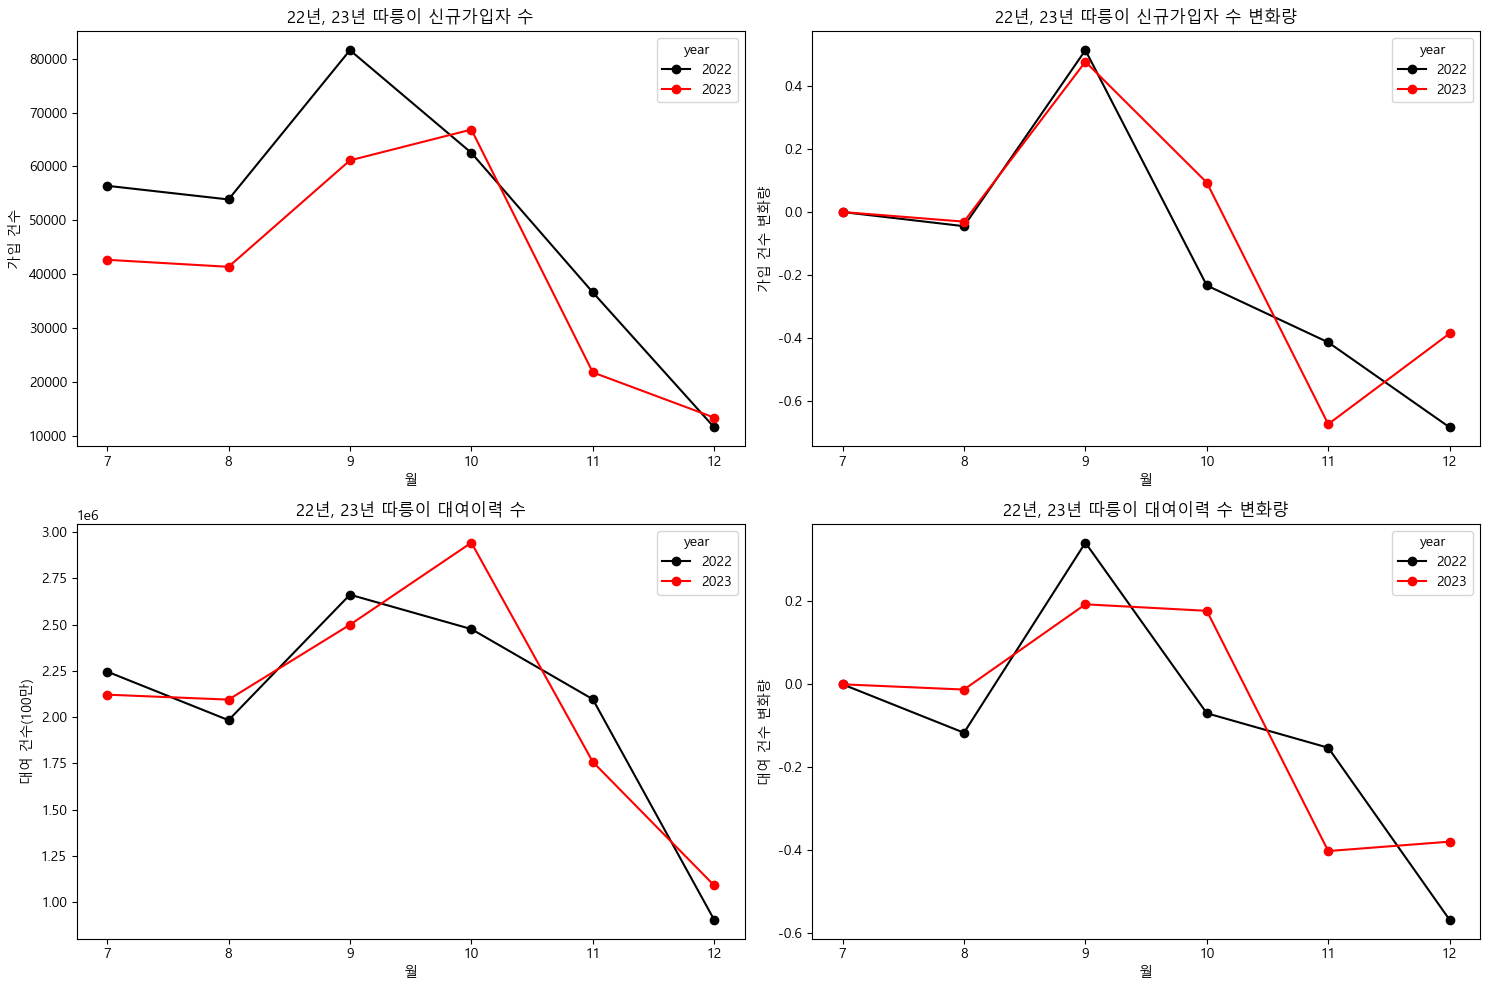

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

df_newb_groupby.pivot(index='month', columns='year', values='가입건수').plot(kind='line', ax=axs[0, 0], marker='o', color=['black', 'red'])
axs[0, 0].set_title('22년, 23년 따릉이 신규가입자 수')
axs[0, 0].set_xlabel('월')
axs[0, 0].set_ylabel('가입 건수')

df_newb_groupby.pivot(index='month', columns='year', values='가입_변화량').plot(kind='line', ax=axs[0, 1], marker='o', color=['black', 'red'])
axs[0, 1].set_title('22년, 23년 따릉이 신규가입자 수 변화량')
axs[0, 1].set_xlabel('월')
axs[0, 1].set_ylabel('가입 건수 변화량')

df_rental_groupby.pivot(index='month', columns='year', values='자전거번호').plot(kind='line', ax=axs[1, 0], marker='o', color=['black', 'red'])
axs[1, 0].set_title('22년, 23년 따릉이 대여이력 수')
axs[1, 0].set_xlabel('월')
axs[1, 0].set_ylabel('대여 건수(100만)')

df_rental_groupby.pivot(index='month', columns='year', values='대여_변화량').plot(kind='line', ax=axs[1, 1], marker='o', color=['black', 'red'])
axs[1, 1].set_title('22년, 23년 따릉이 대여이력 수 변화량')
axs[1, 1].set_xlabel('월')
axs[1, 1].set_ylabel('대여 건수 변화량')

plt.tight_layout()
plt.show()

- 신규가입자, 대여이력(사용량)의 증가추이는 교통요금 인상에 따라 증가한 것으로 보인다.
- 8월부터 10월까지의 변경추이를 봤을 때, 신규 가입자의 변동폭이 크다는 것을 확인할 수 있었고, 이는 관심이 많이졌다라고 해석하였다.
- 실제 정책은 8월 12일경 시행이 되었으나, 그에 대한 체감을 하기 위한 기간이 필요하다 생각하였다. <br/>
2023년은 증가하지만, 2022년은 감소하는 그래프를 보았을 때, 실제 한달 뒤 9월에 결과가 반영되었다고 생각하였다.
- 2022년도에 신규가입 이벤트가 있어 사용자가 증가한 것으로 보인다. (https://blog.naver.com/haechiseoul/222796491924)

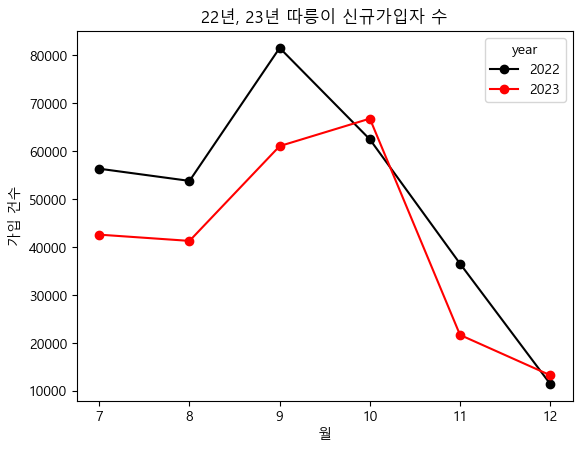

In [ ]:
ax = df_newb_groupby.pivot(index='month', columns='year', values='가입건수').plot(kind='line', marker='o', color=['black', 'red'])
ax.set_title('22년, 23년 따릉이 신규가입자 수')
ax.set_xlabel('월')
ax.set_ylabel('가입 건수')

plt.show()

In [ ]:
broken_counts = (
    df_broken
    .groupby([df_broken['등록일시'].dt.year.rename('year'), df_broken['등록일시'].dt.month.rename('month')])
    .agg({'자전거번호' : 'size'})
    .reset_index()
    .assign(
        고장_변화량=lambda x: x.groupby('year')['자전거번호'].pct_change().fillna(0)  # 연도별로 변화량 계산
    )
)

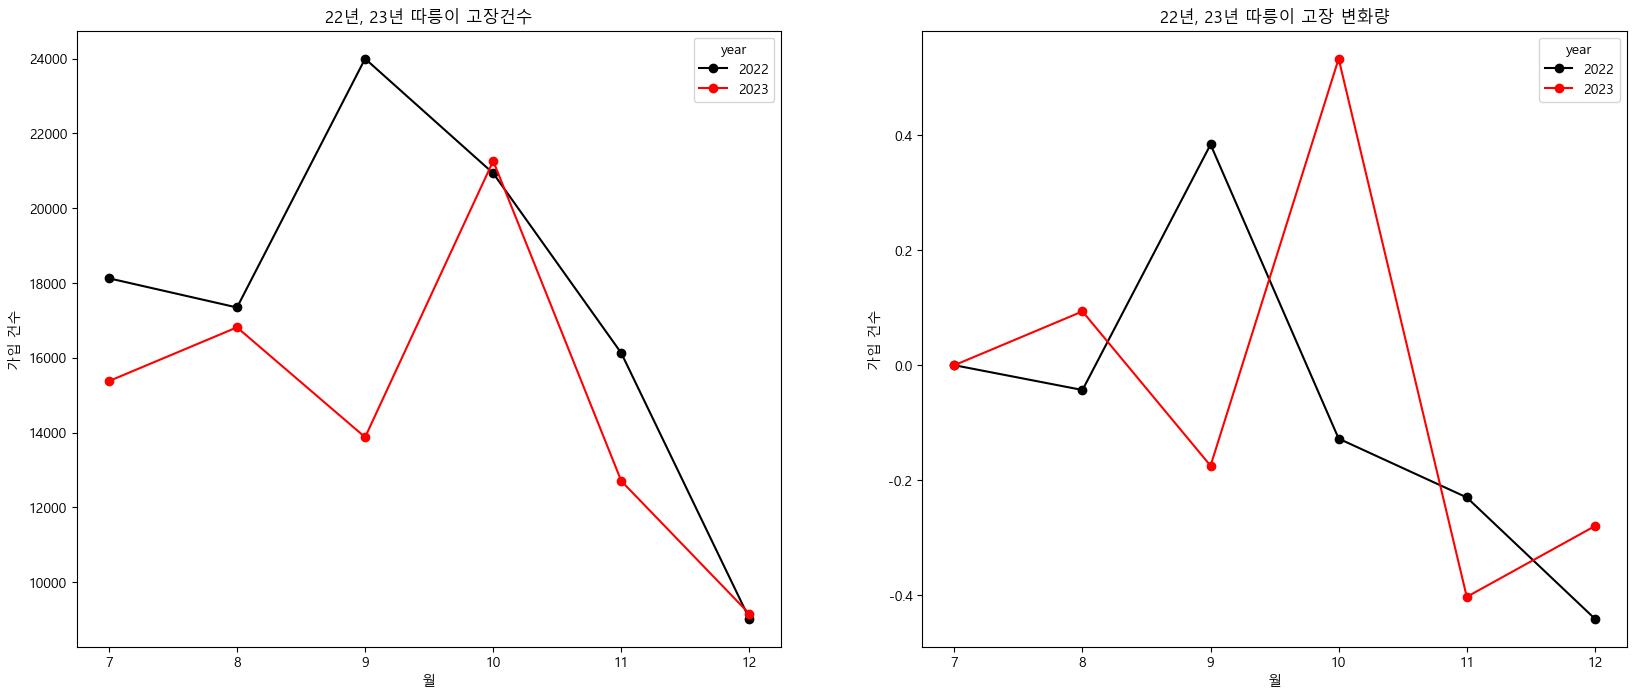

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

broken_counts.pivot(index='month', columns='year', values='자전거번호').plot(kind='line', ax=axs[0], marker='o', color=['black', 'red'])
axs[0].set_title('22년, 23년 따릉이 고장건수')
axs[0].set_xlabel('월')
axs[0].set_ylabel('가입 건수')

broken_counts.pivot(index='month', columns='year', values='고장_변화량').plot(kind='line', ax=axs[1], marker='o', color=['black', 'red'])
axs[1].set_title('22년, 23년 따릉이 고장 변화량')
axs[1].set_ylabel('가입 건수')
axs[1].set_xlabel('월')

plt.show()

- 월별 고장 신고 횟수가 2022년도 2023년도에 9월에 큰 차이를 보인다. <br/>
-> 외부적인 요인이 발생했을 가능성을 찾아봐야할 것 같다. (예를 들어, 따릉이 측의 고장 전수조사를 통한 고장 신고량 증가)

# 추론통계

병합 데이터 불러오기

In [ ]:
df_newb = pd.read_csv('./data/원본/신규가입자정보.csv')
df_rental = pd.read_csv('./data/원본/대여이력정보.csv')
df_broken = pd.read_csv('./data/원본/고장신고내역.csv')

EDA에서 완료한 모든 데이터 전처리를 압축한 데이터 파이프라인으로 데이터 전처리

utils.py 참고!

In [ ]:
df_newb = pipe_newb(df_newb)
df_rental = pipe_rental(df_rental)
df_broken = pipe_broken(df_broken)

## 1. 시계열 그래프 추세 시각화 -> 2022년과 2023년 패턴이 다르다는 것을 발견

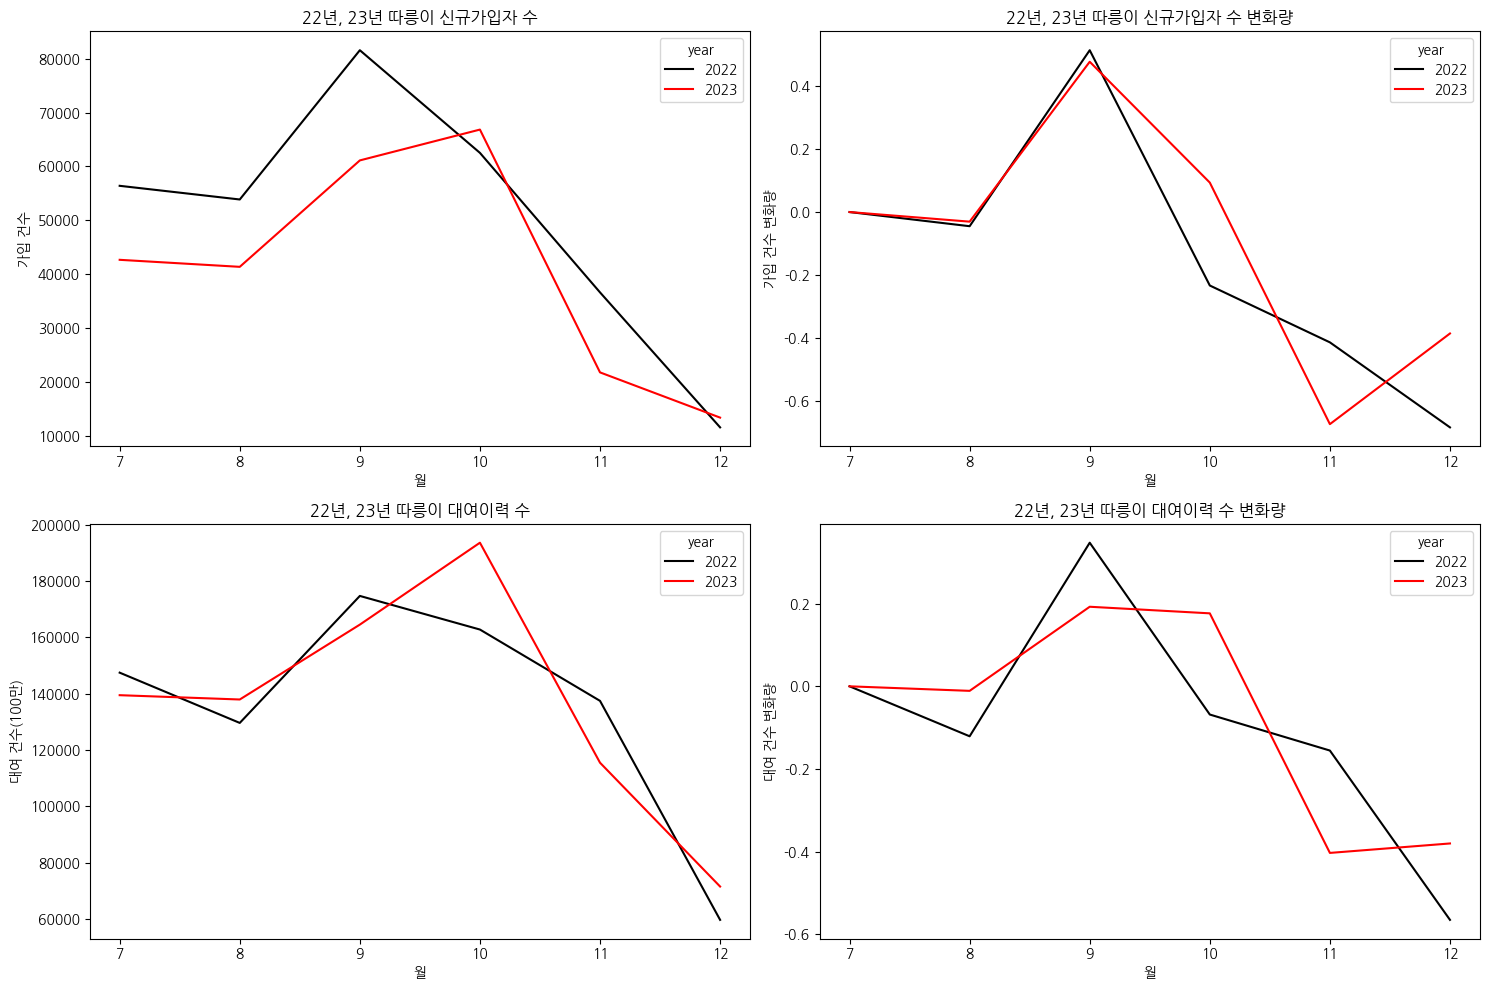

In [ ]:
# 신규가입자 건수 groupby
df_newb_groupby = (
    df_newb
    .groupby([df_newb['가입일시'].dt.year.rename('year'), df_newb['가입일시'].dt.month.rename('month')])
    .agg({'가입건수':'sum'})
    .reset_index()    
)
# 신규가입자 건수 2022년도 변화량
df_newb22_groupby = (
    df_newb_groupby
    .loc[df_newb_groupby['year'] == 2022]
    .assign(가입건수_변화량= lambda x: x['가입건수'].pct_change().fillna(0))
) 
# 신규가입자 건수 2023년도 변화량
df_newb23_groupby = (
    df_newb_groupby
    .loc[df_newb_groupby['year'] == 2023]
    .assign(가입건수_변화량= lambda x: x['가입건수'].pct_change().fillna(0))
) 
# 신규가입자 건수 및 변화량 2022년도 2023년도 병합
df_newb_groupby = pd.concat([df_newb22_groupby, df_newb23_groupby])


# 대여이력 건수 groupby
df_rental_groupby = (
    df_rental
    .groupby([df_rental['대여일시'].dt.year.rename('year'), df_rental['대여일시'].dt.month.rename('month')])
    .agg({'자전거번호':'size'})
    .reset_index()
) 
# 대여이력 건수 2022년도 변화량
df_rental22_groupby = (
    df_rental_groupby
    .loc[df_rental_groupby['year'] == 2022]
    .assign(대여건수_변화량= lambda x: x['자전거번호'].pct_change().fillna(0))
) 
# 대여이력 건수 2023년도 변화량
df_rental23_groupby = (
    df_rental_groupby
    .loc[df_rental_groupby['year'] == 2023]
    .assign(대여건수_변화량= lambda x: x['자전거번호'].pct_change().fillna(0))
) 
# 대여이력 건수 및 변화량 2022년도 2023년도 병합
df_rental_groupby = pd.concat([df_rental22_groupby, df_rental23_groupby])

# 신규가입자 정보 및 대여이력정보 시각화
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 신규가입자 건수 시각화
df_newb_groupby.pivot(index='month', columns='year', values='가입건수').plot(kind='line', color=['black', 'red'], ax=axs[0, 0])
axs[0, 0].set_title('22년, 23년 따릉이 신규가입자 수')
axs[0, 0].set_xlabel('월')
axs[0, 0].set_ylabel('가입 건수')

# 신규가입자 변화량 시각화
df_newb_groupby.pivot(index='month', columns='year', values='가입건수_변화량').plot(kind='line', color=['black', 'red'], ax=axs[0, 1])
axs[0, 1].set_title('22년, 23년 따릉이 신규가입자 수 변화량')
axs[0, 1].set_xlabel('월')
axs[0, 1].set_ylabel('가입 건수 변화량')

# 대여이력 건수 시각화
df_rental_groupby.pivot(index='month', columns='year', values='자전거번호').plot(kind='line', color=['black', 'red'], ax=axs[1, 0])
axs[1, 0].set_title('22년, 23년 따릉이 대여이력 수')
axs[1, 0].set_xlabel('월')
axs[1, 0].set_ylabel('대여 건수(100만)')

# 대여이력 변화량 시각화
df_rental_groupby.pivot(index='month', columns='year', values='대여건수_변화량').plot(kind='line', color=['black', 'red'],ax=axs[1, 1])
axs[1, 1].set_title('22년, 23년 따릉이 대여이력 수 변화량')
axs[1, 1].set_xlabel('월')
axs[1, 1].set_ylabel('대여 건수 변화량')

plt.tight_layout()
plt.show()

In [ ]:
df_rental22_groupby = df_rental22_groupby.rename(columns={'자전거번호': '대여건수'})
df_rental23_groupby = df_rental23_groupby.rename(columns={'자전거번호': '대여건수'})
df_rental22_groupby.head()

,year,month,대여건수,대여건수_변화량
0,2022,7,147510,0.000000
1,2022,8,129666,-0.120968
2,2022,9,174749,0.347686
3,2022,10,162814,-0.068298
4,2022,11,137498,-0.155490


신규가입자와 대여이력의 경우, 대중교통 요금 인상 시기 한달 후인 각 9월 11월에 대해 지난 년도와 달리 상승폭 보이는 그래프의 형태가 보였고 이는 대중 교통 요금 인상이 영향을 준다고 판단 -> 더 자세한 추론 통계를 진행

## 2. 두 연도간의 비교 

### 2-1. t-test : 연간 평균 가입자 수를 비교 (정규성 가정이 충족되지 않을 경우, Mann-Whitney U test와 같은 비모수 검정)

Shapiro-Wilk test : 정규성 검사

귀무 가설 H0: '데이터가 정규분포를 따른다.'

대립 가설 H1: '데이터가 정규분포를 따르지 않는다.'

In [ ]:
#정규성
print(stats.shapiro(df_rental22_groupby['대여건수']))
print(stats.shapiro(df_rental23_groupby['대여건수']))
#t-test
t_stat_use, p_value_use = stats.ttest_ind(df_rental22_groupby['대여건수'],df_rental23_groupby['대여건수'])
print("2022-2023년 대여건수 t-tset:", t_stat_use)
print("2022-2023년 대여건수 p-value:", p_value_use)

ShapiroResult(statistic=0.8624640974880204, pvalue=0.19778142411056415)
ShapiroResult(statistic=0.9791561257326477, pvalue=0.9472868667650852)
2022-2023년 대여건수 t-tset: -0.07599845039857428
2022-2023년 대여건수 p-value: 0.9409192873258406


Shapiro-Wilk의 p-value값이 둘 다 0.05를 넘기 때문에 데이터가 정규 분포를 따른다라고 판단. 

T-test 진행

T-test의 p-value가 0.94로 2022년도와 2023년도의 대여건수는 통계적으로 유의미한 차이가 없다.

### 2-2. 반복측정 anova : 월 별 비교 

In [ ]:
#정규성 가정
data = df_rental.groupby([df_rental['대여일시'].dt.year, df_rental['대여일시'].dt.month])['자전거번호'].count()
data.index.names=['연도', '월']
data = pd.DataFrame(data)
data.reset_index(inplace = True)
data['변화량'] = data.groupby('연도')['자전거번호'].pct_change()

stat, p_value = shapiro(data['변화량'].fillna(0))
print(f"변화량 Shapiro-Wilk Test P-value: {p_value}")

변화량 Shapiro-Wilk Test P-value: 0.8394595776989427


월별 대여건수에 대한 변화량을 기반으로 정규성 검사를 진행

p-value가 0.05을 넘기 때문에 정규분포를 따른다라고 판단.

In [ ]:
data['변화량'] = data['변화량'].fillna(0)

# AnovaRM을 사용하여 반복 측정 ANOVA 수행
anova = AnovaRM(data=data, depvar='변화량', subject='월', within=['연도'])

anova_results = anova.fit()

# 결과 출력
print(anova_results)

             Anova
   F Value Num DF Den DF Pr > F
-------------------------------
연도  0.0830 1.0000 5.0000 0.7848



연도에 따라 대여건수의 변화량에 차이가 있는지 알아보기 위해 AnovaRM사용

F-Value : 0.083

P-Value(Pr>F) : 0.78

**22년도와 23년도 월별 대여 변화량에 차이가 없다라는 결론**

In [ ]:
data['변화량'] = data['변화량'].fillna(0)

# AnovaRM을 사용하여 반복 측정 ANOVA 수행
anova = AnovaRM(data=data, depvar='자전거번호', subject='월', within=['연도'])

anova_results = anova.fit()

# 결과 출력
print(anova_results)

             Anova
   F Value Num DF Den DF Pr > F
-------------------------------
연도  0.0546 1.0000 5.0000 0.8245



연도에 따라 대여건수 차이를 알아보기 위한 AnovaRM

F-Value : 0.0546 

P-Value(Pr>F) : 0.8245

**22년도와 23년도 월별 대여 변화량에 차이가 없다라는 결론**

## 3. 요금 인상 전 후의 비교 

### 3-1. t-test : 8월 인상 전 후, 10월 인상 전 후 

In [ ]:
df_rental['year'] = df_rental['대여일시'].dt.year
df_rental['month'] = df_rental['대여일시'].dt.month
df_rental['day'] = df_rental['대여일시'].dt.day
df_rental['대여건수'] = df_rental.groupby(['year', 'month', 'day'])['대여일시'].transform('count')
df_increase = df_rental[['year', 'month', 'day', '대여건수']]
df_increase=df_increase.groupby(['year','month', 'day'])['대여건수'].sum().reset_index()
data_jul_to_aug = df_increase[(df_increase['month'] >= 7) & (df_increase['month'] <= 8)]
data_sept_to_oct = df_increase[(df_increase['month'] >= 9) & (df_increase['month'] <= 10)]
data_nov_to_dec = df_increase[(df_increase['month'] >= 11) & (df_increase['month'] <= 12)]
group_before = data_jul_to_aug[data_jul_to_aug['year'] == 2023]
group_first = data_sept_to_oct[data_sept_to_oct['year'] == 2023]
group_second = data_nov_to_dec[data_nov_to_dec['year'] == 2023]

In [ ]:
#정규성 확인
shapiro_jul_aug = stats.shapiro(group_before['대여건수'])
shapiro_sept_oct = stats.shapiro(group_first['대여건수'])
shapiro_nov_dec = stats.shapiro(group_second['대여건수'])
print(shapiro_jul_aug)
print(shapiro_sept_oct)
print(shapiro_nov_dec)

ShapiroResult(statistic=0.9589993948460758, pvalue=0.03692943818960551)
ShapiroResult(statistic=0.9352055165552355, pvalue=0.0030254872451960214)
ShapiroResult(statistic=0.8400315369382318, pvalue=1.333789019839118e-06)


In [ ]:
#Mann-Whitney U Test
mannwhitney_jul_sept = stats.mannwhitneyu(group_before['대여건수'], group_first['대여건수'], alternative='two-sided')
mannwhitney_sept_nov = stats.mannwhitneyu(group_first['대여건수'], group_second['대여건수'], alternative='two-sided')
print(f'mannwhitney_jul_sept: {mannwhitney_jul_sept}')
print(f'mannwhitney_sept_nov: {mannwhitney_sept_nov}')

mannwhitney_jul_sept: MannwhitneyuResult(statistic=906.0, pvalue=6.356131037062866e-07)
mannwhitney_sept_nov: MannwhitneyuResult(statistic=3328.0, pvalue=5.835802572243551e-14)


2023년도 데이터의 시점을 인상전,버스요금인상,지하철요금인상의 구분을 둬 요금 인상 시점 전 후로 통계적으로 유의미한 차이가 있는지 검증

1. 정규성 검증 Shapiro-Wilk 검정:
세 범위 다 p-value가 0.05 이하이므로 정규분포를 따르지 않음

2. 정규성을 만족하지 않기 때문에 Mann-Whitney U 검정:
p-value의 값이 0.05 이하이므로 요금 인상 전 후로 대여건수의 유의미한 차이가 있다.

### 3-2. anova : 인상 전, 첫 인상 후, 두 번째 인상 후

In [ ]:
#kruskal-Wallis H 검정
kruskal_result = stats.kruskal(group_before['대여건수'], group_first['대여건수'], group_second['대여건수'])
print("Kruskal-Wallis 검정 결과:", kruskal_result)

Kruskal-Wallis 검정 결과: KruskalResult(statistic=68.32238098562644, pvalue=1.4587587488484915e-15)


세 데이터가 정규성을 만족하지 않기 때문에 기존의 Anova를 사용하는 방식은 맞지 않음

Kruskal-Wallis 검정: 세 그룹 이상의 독립된 그룹 간 차이를 비교하는 비모수적 검정 방식 정규성 가정 없이 그룹 간 차이를 분석할 수 있음

p-value 0.05보다 작기 때문에 세 그룹의 유의미한 차이가 있다고 결론

### 계절성에 대한 특징을 없애기 위해 이동 평균의 방식을 이용

In [ ]:
merge_df = pd.concat([data_jul_to_aug,data_sept_to_oct,data_nov_to_dec])
merge_df.sort_values(by='day', ascending=True)
merge_df

,year,month,day,대여건수
0,2022,7,1,34398225
1,2022,7,2,23299929
2,2022,7,3,17081689
3,2022,7,4,28515600
4,2022,7,5,28408900
...,...,...,...,...
363,2023,12,27,7929856
364,2023,12,28,7817616
365,2023,12,29,8561476
366,2023,12,30,273529


In [ ]:
group_df_22 = merge_df[merge_df['year'] == 2022]
group_df_23 = merge_df[merge_df['year'] == 2023] 

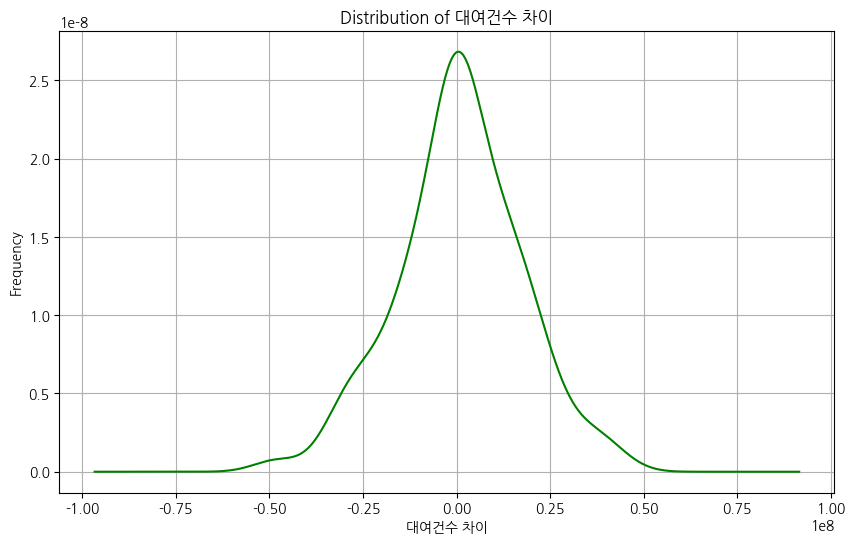

In [ ]:
comparison_df = pd.merge(group_df_22, group_df_23, on=['month', 'day'], suffixes=('_22', '_23'))
comparison_df['대여건수_차이'] = comparison_df['대여건수_23'] - comparison_df['대여건수_22']

use_count_difference = comparison_df['대여건수_차이']

# Plot the histogram
plt.figure(figsize=(10, 6))
use_count_difference.plot(kind='kde', color='green')
plt.title('Distribution of 대여건수 차이')
plt.xlabel('대여건수 차이')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
comparison_df = pd.merge(group_df_22, group_df_23, on=['month', 'day'], suffixes=('_22', '_23'))
comparison_df['대여건수_차이'] = comparison_df['대여건수_23'] - comparison_df['대여건수_22']

In [ ]:
group_7_8 = comparison_df[(comparison_df['month'] == 7) | (comparison_df['month'] == 8)]
group_9_10 = comparison_df[(comparison_df['month'] == 9) | (comparison_df['month'] == 10)]
group_11_12 = comparison_df[(comparison_df['month'] == 11) | (comparison_df['month'] == 12)]

In [ ]:
#정규성 확인
shapiro_jul_aug = stats.shapiro(group_7_8['대여건수_차이'])
shapiro_sept_oct = stats.shapiro(group_9_10['대여건수_차이'])
shapiro_nov_dec = stats.shapiro(group_11_12['대여건수_차이'])
print(f'shapiro_jul_aug:{shapiro_jul_aug}')
print(f'shapiro_sept_oct:{shapiro_sept_oct}')
print(f'shapiro_nov_dec:{shapiro_nov_dec}')

shapiro_jul_aug:ShapiroResult(statistic=0.9846420890602211, pvalue=0.6304701481232631)
shapiro_sept_oct:ShapiroResult(statistic=0.9768512686758184, pvalue=0.3000327295439549)
shapiro_nov_dec:ShapiroResult(statistic=0.9535264941089006, pvalue=0.021281244077499057)


In [ ]:
#Kruskal 방식 사용
kruskal_test_result = stats.kruskal(group_7_8['대여건수_차이'], group_9_10['대여건수_차이'], group_11_12['대여건수_차이'])
kruskal_test_result

KruskalResult(statistic=3.5321418295955027, pvalue=0.17100355815059343)

세 그룹 중 11~12월의 데이터가 정규성을 만족하지 않기 때문에 Kruskal방식 사용

p-value이 0.05를 넘기 떄문에 세 그룹간 유의미한 차이가 없다고 결론

### 3-3. 시계열 분해 : 추세, 계절성, 불규칙성으로 분해

- 추세 > 장기적인 흐름 (대여 건수가 시간이 지남에 따라 증가/감소 하는지) 
- 계절성 > 패턴 (특정 달에 대여 건수가 항상 더 많은지/적은지) 
- 불규칙성 > 일시적 변동이나 특정 이벤트 (잔차) 

In [ ]:
rental_date = df_rental.groupby(pd.to_datetime(df_rental['대여일시'].dt.date.rename('date')))['자전거번호'].count().reset_index()

<Axes: >

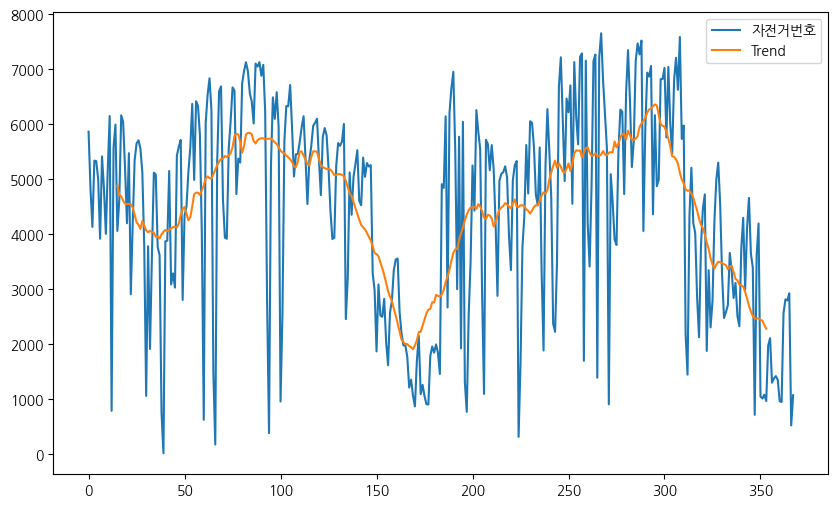

In [ ]:
# 추세
rental_date['Trend'] = rental_date['자전거번호'].rolling(window=30, center=True).mean()
rental_date[['자전거번호', 'Trend']].plot(figsize=(10, 6))

<Axes: >

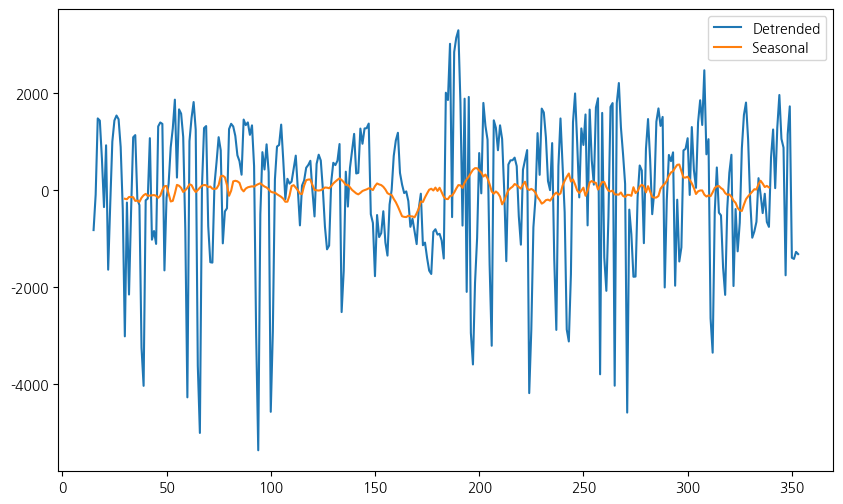

In [ ]:
# 계절성을 구하기 위해 추세를 뺀 나머지 값 계산
rental_date['Detrended'] = rental_date['자전거번호'] - rental_date['Trend']

# 데이터에서 계절성을 구하기 (단순 평균을 사용)
# seasonal_period = 1 * 30  # 1개월
seasonal_period = 30
rental_date['Seasonal'] = rental_date['Detrended'].rolling(window=seasonal_period, center=True).mean()

# 계절성 시각화
rental_date[['Detrended', 'Seasonal']].plot(figsize=(10, 6))

<Axes: title={'center': 'Residual (잔차)'}>

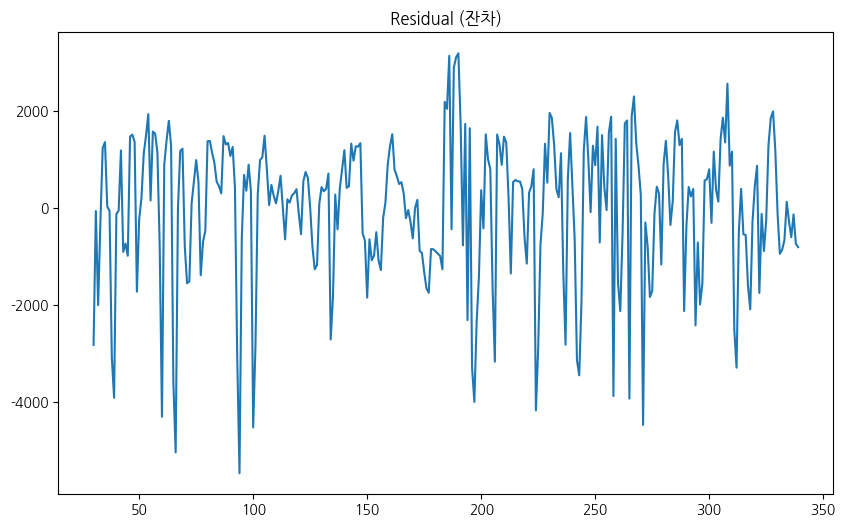

In [ ]:
# 잔차 계산
rental_date['Residual'] = rental_date['자전거번호'] - rental_date['Trend'] - rental_date['Seasonal']

# 잔차 시각화
rental_date['Residual'].plot(figsize=(10, 6), title='Residual (잔차)')

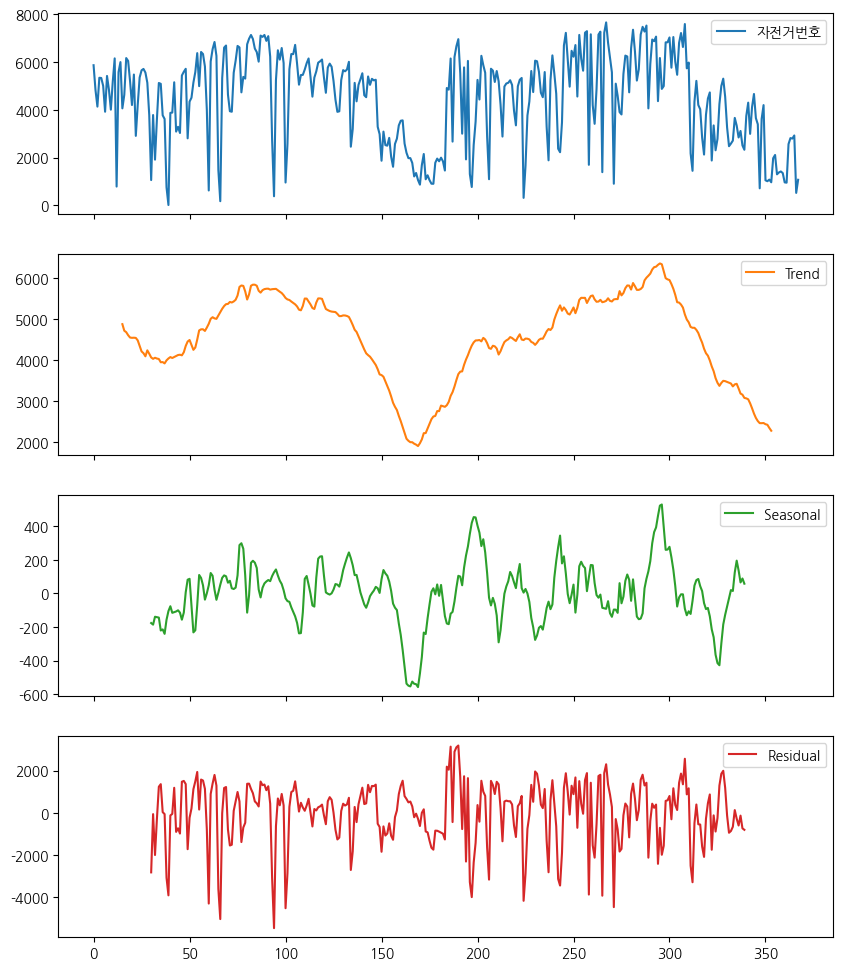

In [ ]:
# 전체 성분을 시각화
rental_date[['자전거번호', 'Trend', 'Seasonal', 'Residual']].plot(subplots=True, figsize=(10, 12), layout=(4, 1))
plt.show()

추세 : 데이터의 변동이 많고, 특정 패턴이 명확히 보이지 않음
-> 초기 상승세를 보이다가 중간 지점에서 최고점을 도달한 후 하락세를 보이는 형태를 보임

계절성 : 일정한 주기에 따라 대여 건수의 증가와 감소를 반복하는 형태
진폭이 400-600대까지의 변동을 보이는 것으로 주기적으로 발생하는 계절적 요인이 자전거 대여 건수에 영향을 미친다고 할 수 있음

잔차 : 추세와 계절성으로 설명되지 않는 무작위적인 변동을 의미
잔차의 변동성이 큰 것으로 대여 건수에 설명되지 않을 요인이 많이 작용한 것을 의미

*현 실험 데이터와 무관하지만 코로나상황,대중요금인상,신규가입자 및 이용 이벤트 등이 될 수 있음